# Diabetes Factor Data Analysis

In [4]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Loading dataset and viewing records 
dataset = pd.read_csv('diabetes.csv') 

In [4]:
#Checking the No. of Columns and Rows
dataset.shape

(768, 9)

In [5]:
#Checking the Satistics of the data
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Attributes Glucose, BloodPressure, SkinThickness, Insulin, BMI having non-realistic value (0). 
We can try to expose dataset without handling 0 value and observe performance.

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Columns DiabetesPedigreeFunction and BMI have float datatype. Rest are of integer datatype.

## Data Visualisation

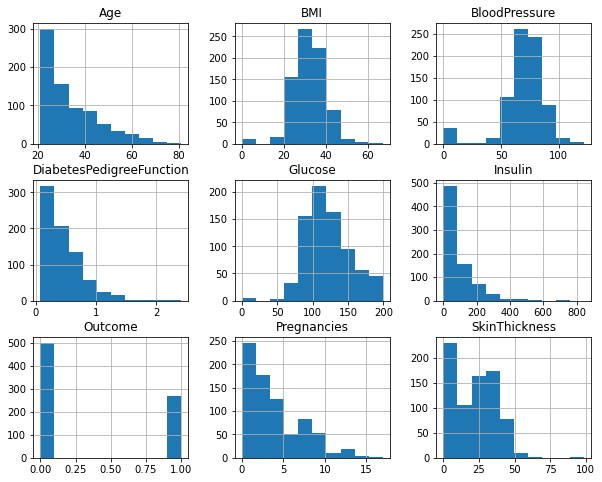

In [11]:
#Histogram
dataset.hist(figsize = (10,8))
plt.show()

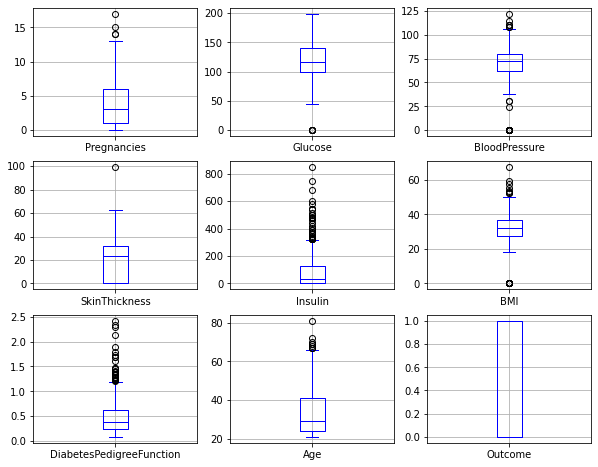

In [30]:
#Box Plot
dataset.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8),grid='true',color='blue')
plt.show()

### Inference at this point

- Minimum values for many variables are 0.
- As biological parameters like Glucose, BP, Skin thickness,Insulin & BMI cannot have zero values,
looks like null values have been coded as zeros
- As a next step, find out how many Zero values are included in each variable

In [12]:
# Counting cells with 0 Values for each variable 
(dataset.Pregnancies == 0).sum(),(dataset.Glucose==0).sum(),(dataset.BloodPressure==0).sum(),(dataset.SkinThickness==0).sum(),(dataset.Insulin==0).sum(),(dataset.BMI==0).sum(),(dataset.DiabetesPedigreeFunction==0).sum(),(dataset.Age==0).sum()

(111, 5, 35, 227, 374, 11, 0, 0)

## Inference

- As Zero Counts of some the variables are as high as 374 and 227, in a 768 data set, it is better to remove the Zeros uniformly for 5 variables (excluding Pregnancies & Outcome)
- As a next step, we’ll drop 0 values and create a our new dataset which can be used for further analysis

In [13]:
# Creating a dataset called 'dia' from original dataset 'diab' with excludes all rows with have zeros only for Glucose, BP, 
# Skinthickness, Insulin and BMI, as other columns can contain Zero values.

drop_Glu=dataset.index[dataset.Glucose == 0].tolist()
drop_BP=dataset.index[dataset.BloodPressure == 0].tolist()
drop_Skin = dataset.index[dataset.SkinThickness==0].tolist()
drop_Ins = dataset.index[dataset.Insulin==0].tolist()
drop_BMI = dataset.index[dataset.BMI==0].tolist()
c=drop_Glu+drop_BP+drop_Skin+drop_Ins+drop_BMI
dia=dataset.drop(dataset.index[c])

In [14]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


### Inference

- We created a cleaned up list named “dia” which has 392 rows of data instead of 768 from original list
- We lost nearly 50% of data but our data set is now cleaner than before

In [15]:
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Split the dataset into 2 sub sets for convenience of analysis

dia1 Subset : All samples with 1 as Outcome\
dia0 Subset: All samples with 0 as Outcome

In [16]:
dia1 = dia[dia.Outcome==1]
dia0 = dia[dia.Outcome==0]

In [17]:
dia1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
732,2,174,88,37,120,44.5,0.646,24,1
740,11,120,80,37,150,42.3,0.785,48,1
748,3,187,70,22,200,36.4,0.408,36,1
753,0,181,88,44,510,43.3,0.222,26,1


In [18]:
dia0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
18,1,103,30,38,83,43.3,0.183,33,0
20,3,126,88,41,235,39.3,0.704,27,0
27,1,97,66,15,140,23.2,0.487,22,0
28,13,145,82,19,110,22.2,0.245,57,0
...,...,...,...,...,...,...,...,...,...
747,1,81,74,41,57,46.3,1.096,32,0
751,1,121,78,39,74,39.0,0.261,28,0
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


### Screening Variable – Outcome

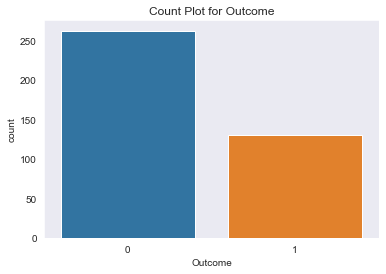

In [25]:
## creating count plot
sns.countplot(x=dia.Outcome)
plt.title("Count Plot for Outcome")
plt.show()

In [27]:
# Computing the %age of diabetic and non-diabetic in the sample
diabetic=len(dia1)
nonDiabetic=len(dia0)
Total=diabetic+nonDiabetic
PC_diabetic = diabetic*100/Total
PC_nonDiabetic = nonDiabetic*100/Total
print('Diabetic Count=',PC_diabetic,'%')
print('Non-Diabetic Count=',PC_nonDiabetic,'%')

Diabetic Count= 33.16326530612245 %
Non-Diabetic Count= 66.83673469387755 %


### Screening Variable – Pregnancies

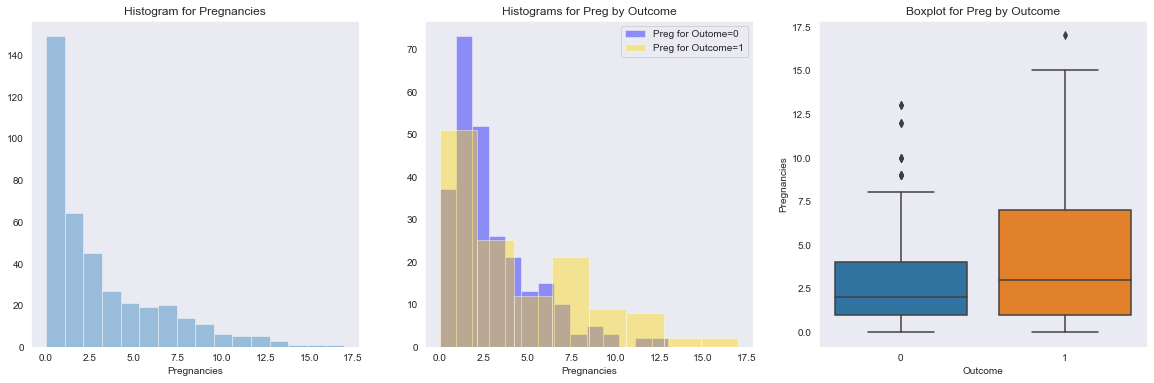

In [28]:
#Creating 3 subplots - 1st for histogram, 2nd for histogram segmented by Outcome and 3rd for representing same 
#segmentation using boxplot
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Pregnancies")
sns.distplot(dia.Pregnancies,kde=False)

plt.subplot(1,3,2)
sns.distplot(dia0.Pregnancies,kde=False,color="Blue", label="Preg for Outome=0")
sns.distplot(dia1.Pregnancies,kde=False,color = "Gold", label = "Preg for Outcome=1")
plt.title("Histograms for Preg by Outcome")
plt.legend()

plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome,y=dataset.Pregnancies)
plt.title("Boxplot for Preg by Outcome")
plt.show()

### Inference on Pregnancies

- Visually, data is right skewed. On count of pregenancies. A large proportion of the participants are zero count on pregnancy
- In the segemented histograms,hypothesis is more pregnancies causes more women to be diabetic
- In the boxplots, we find few outliers in both subsets. Esp some non-diabetic women have had many pregenancies

### Screening Variable – Glucose

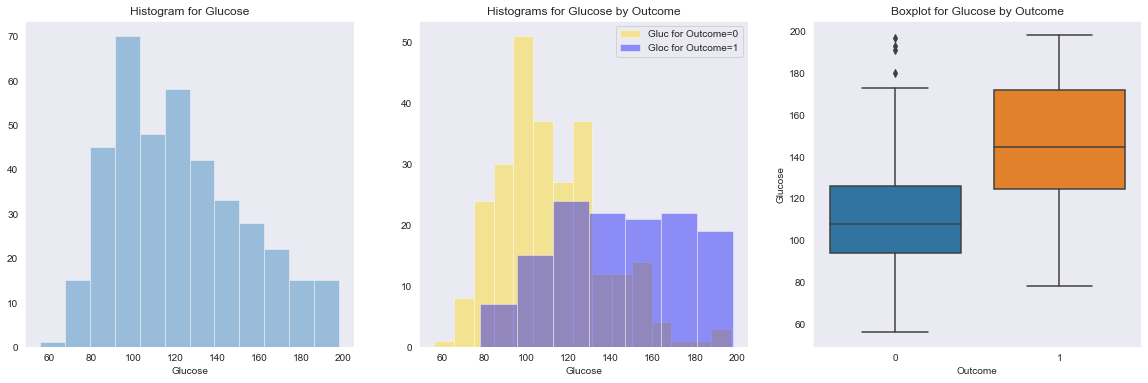

In [29]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.title("Histogram for Glucose")
sns.distplot(dia.Glucose, kde=False)

plt.subplot(1,3,2)
sns.distplot(dia0.Glucose,kde=False,color="Gold", label="Gluc for Outcome=0")
sns.distplot(dia1.Glucose, kde=False, color="Blue", label = "Gloc for Outcome=1")
plt.title("Histograms for Glucose by Outcome")
plt.legend()

plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome,y=dataset.Glucose)
plt.title("Boxplot for Glucose by Outcome")
plt.show()

### Inference on Glucose

- 1st graph – Histogram of Glucose data is slightly skewed to right.The grand mean of Glucose is at 120.89

- 2nd &3rd graph – Glucose levels of dibetics are higher

### Screening Variable – Blood Pressure

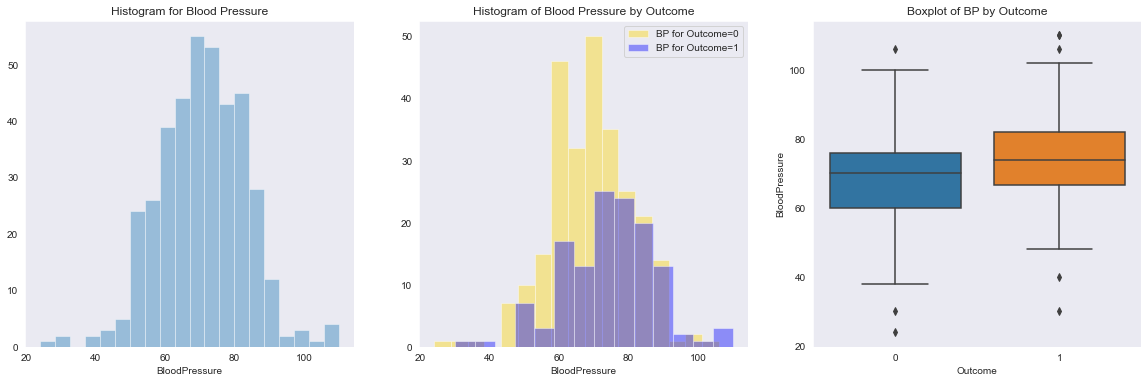

In [30]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.BloodPressure, kde=False)
plt.title("Histogram for Blood Pressure")

plt.subplot(1,3,2)
sns.distplot(dia0.BloodPressure,kde=False,color="Gold",label="BP for Outcome=0")
sns.distplot(dia1.BloodPressure,kde=False, color="Blue", label="BP for Outcome=1")
plt.legend()
plt.title("Histogram of Blood Pressure by Outcome")

plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome,y=dataset.BloodPressure)
plt.title("Boxplot of BP by Outcome")
plt.show()

### Inference on Blood Pressure

- 1st graph – Distribution looks normal. Mean value is 69, well within normal values for diastolic of 80 

- 2nd graph – Most non diabetic women seem to have nominal value of 69 and diabetic women seems to have high BP

- 3rd graph – Few outliers in the data. Its likely that some people have low and some have high BP. So the association between diabetic (Outcome) and BP is a suspect and needs to be statistically validated

### Screening Variable – Skin Thickness

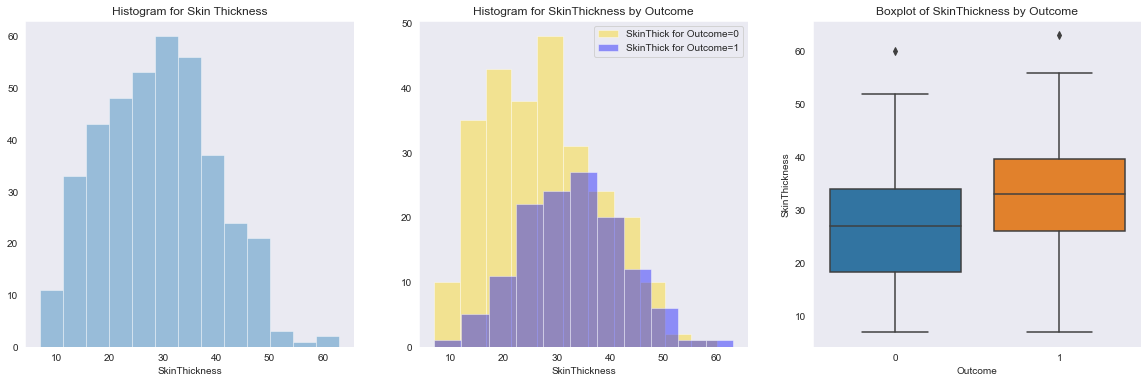

In [31]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.SkinThickness, kde=False)
plt.title("Histogram for Skin Thickness")

plt.subplot(1,3,2)
sns.distplot(dia0.SkinThickness, kde=False, color="Gold", label="SkinThick for Outcome=0")
sns.distplot(dia1.SkinThickness, kde=False, color="Blue", label="SkinThick for Outcome=1")
plt.legend()
plt.title("Histogram for SkinThickness by Outcome")

plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome, y=dataset.SkinThickness)
plt.title("Boxplot of SkinThickness by Outcome")
plt.show()

### Inferences for Skinthickness

- 1st graph – Skin thickness seems be be skewed a bit

- 2nd graph – Like BP, people who are not diabetic have lower skin thickness. This is a hypothesis that has to be validated. As data of non-diabetic is skewed but diabetic samples seems to be normally distributed

## Screening Variable – Insulin

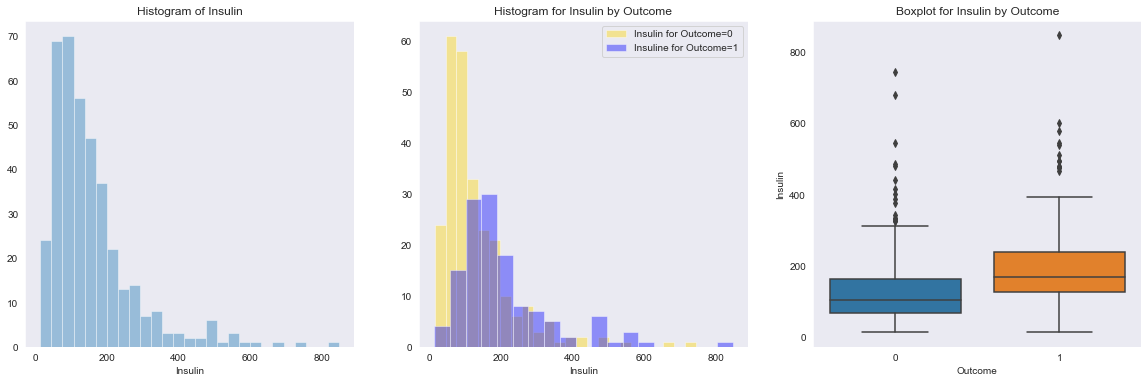

In [32]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.Insulin,kde=False)
plt.title("Histogram of Insulin")

plt.subplot(1,3,2)
sns.distplot(dia0.Insulin,kde=False, color="Gold", label="Insulin for Outcome=0")
sns.distplot(dia1.Insulin,kde=False, color="Blue", label="Insuline for Outcome=1")
plt.title("Histogram for Insulin by Outcome")
plt.legend()

plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome, y=dataset.Insulin)
plt.title("Boxplot for Insulin by Outcome")
plt.show()

### Inference for Insulin

- There are Outliers in the data
- Most of them with higher insulin values are also diabetic

## Screening Variable – BMI

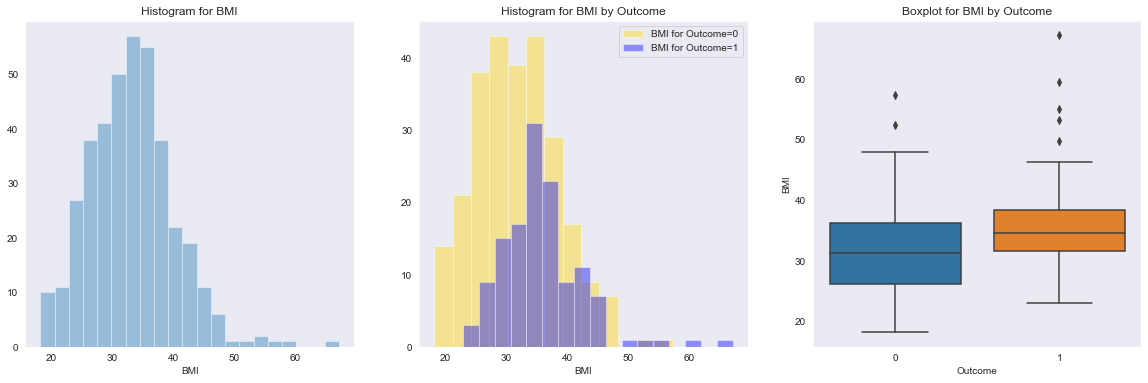

In [33]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.BMI, kde=False)
plt.title("Histogram for BMI")

plt.subplot(1,3,2)
sns.distplot(dia0.BMI, kde=False,color="Gold", label="BMI for Outcome=0")
sns.distplot(dia1.BMI, kde=False, color="Blue", label="BMI for Outcome=1")
plt.legend()
plt.title("Histogram for BMI by Outcome")

plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome, y=dataset.BMI)
plt.title("Boxplot for BMI by Outcome")
plt.show()

### Inference for BMI

- 1st graph – There are few outliers. Few are obese in the dataset. Expected range is between 18 to 25. In general, people are obese

- 2nd graph – Diabetic people seems to be only higher side of BMI. Also they contribute more for outliers

- 3rd graph – Same inference as 2nd graph

### Screening Variable – Diabetes Pedigree Function

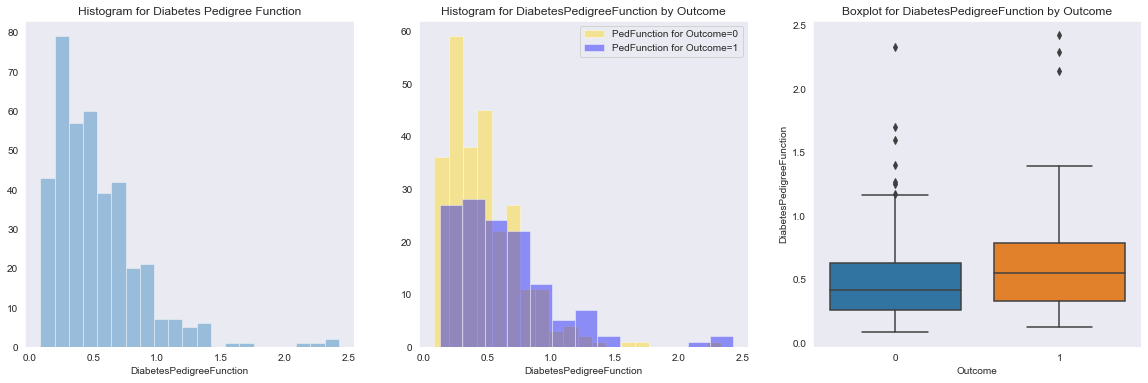

In [34]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.DiabetesPedigreeFunction,kde=False)
plt.title("Histogram for Diabetes Pedigree Function")

plt.subplot(1,3,2)
sns.distplot(dia0.DiabetesPedigreeFunction, kde=False, color="Gold", label="PedFunction for Outcome=0")
sns.distplot(dia1.DiabetesPedigreeFunction, kde=False, color="Blue", label="PedFunction for Outcome=1")
plt.legend()
plt.title("Histogram for DiabetesPedigreeFunction by Outcome")

plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome, y=dataset.DiabetesPedigreeFunction)
plt.title("Boxplot for DiabetesPedigreeFunction by Outcome")
plt.show()

### Inference of Diabetes Pedigree Function

- It doesn’t seem to contribute to diabetes 
- Data is right skewed
- As DPF increases, there seems to be a likelihood of being diabetic, but needs statistical validation

### Screening Variable – Age

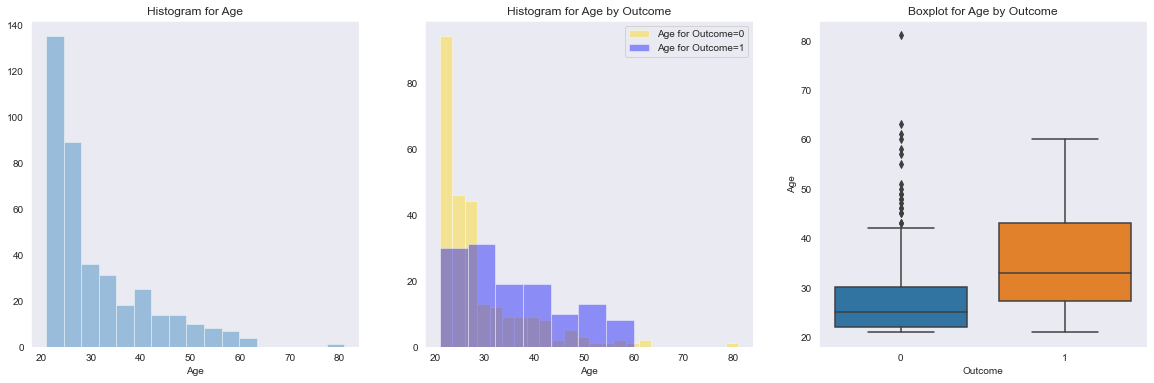

In [35]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.Age,kde=False)
plt.title("Histogram for Age")

plt.subplot(1,3,2)
sns.distplot(dia0.Age,kde=False,color="Gold", label="Age for Outcome=0")
sns.distplot(dia1.Age,kde=False, color="Blue", label="Age for Outcome=1")
plt.legend()
plt.title("Histogram for Age by Outcome")

plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome,y=dataset.Age)
plt.title("Boxplot for Age by Outcome")
plt.show()

### Inference for Age

- Age is skewed. Yes, as this is life data, it is likely to fall into a weibull distribution and not normal
- There is a tendency that as people age, they are likely to become diabetic. This needs statistical validation
- But diabetes, itself doesn’t seem to have an influence of longetivity. May be it impacts quality of life which is not measured in this data set.

### Normality Test

Inference: None of the variables are normal. (P>0.05) May be subsets are normal

In [36]:
## importing stats module from scipy
from scipy import stats

## retrieving p value from normality test function
PregnanciesPVAL=stats.normaltest(dia.Pregnancies).pvalue
GlucosePVAL=stats.normaltest(dia.Glucose).pvalue
BloodPressurePVAL=stats.normaltest(dia.BloodPressure).pvalue
SkinThicknessPVAL=stats.normaltest(dia.SkinThickness).pvalue
InsulinPVAL=stats.normaltest(dia.Insulin).pvalue
BMIPVAL=stats.normaltest(dia.BMI).pvalue
DiaPeFuPVAL=stats.normaltest(dia.DiabetesPedigreeFunction).pvalue
AgePVAL=stats.normaltest(dia.Age).pvalue
## Printing the values
print("Pregnancies P Value is " + str(PregnanciesPVAL))
print("Glucose P Value is " + str(GlucosePVAL))
print("BloodPressure P Value is " + str(BloodPressurePVAL))
print("Skin Thickness P Value is " + str(SkinThicknessPVAL))
print("Insulin P Value is " + str(InsulinPVAL))
print("BMI P Value is " + str(BMIPVAL))
print("Diabetes Pedigree Function P Value is " + str(DiaPeFuPVAL))
print("Age P Value is " + str(AgePVAL))

Pregnancies P Value is 6.155097831782508e-20
Glucose P Value is 1.3277887088487345e-05
BloodPressure P Value is 0.030164917115239397
Skin Thickness P Value is 0.01548332935449814
Insulin P Value is 8.847272035922274e-43
BMI P Value is 1.4285556992424915e-09
Diabetes Pedigree Function P Value is 1.1325395699626466e-39
Age P Value is 1.0358469089881947e-21


### Correlation between variables

Let’s see the correlation between numerical variables.

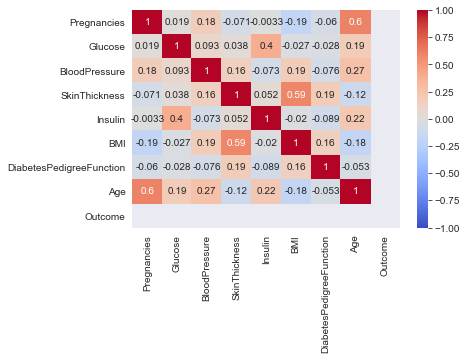

In [22]:
#Correlation Plot for Dibetics
Corr = dia1[dia1.columns].corr()
sns.heatmap(Corr, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

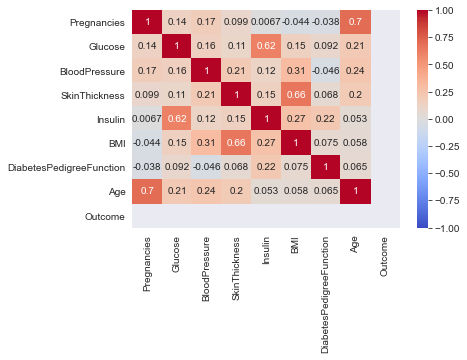

In [23]:
#Correlation Plot for Non Diabetics
Corr = dia0[dia0.columns].corr()
sns.heatmap(Corr, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

## Conclusion

-  Only BMI & SkinThickness, Insulin & Glucose and Pregnancies & Age seem to have positive linear relationships
- Nearly 65% of participants are Non diabetic and 35% are Diabetic in the sample data
- Boxplots and segmented histograms shows that few factors seem to influence the outcome